# Overall Stargal Stats

Preliminary work for star-gal separation. Performs statistics on lephare outputs carried on two synthetic magnitude libraries (one composed of star SED, another of galaxies SEDs).

SPLIT add two columns to LePHARE:
 - pdz_flag: describes the quality of the computed redshift
 - s-type: the most likely type of star (OBAFGKM) if the observed source was a star


In [1]:
### Libraries ###
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from lephare import statsplot as lsp; reload(lsp)
# %matplotlib widget
%matplotlib inline

LEPHAREDIR is being set to the default cache directory:
/home/hallouin/.cache/lephare/data
More than 1Gb may be written there.
LEPHAREWORK is being set to the default cache directory:
/home/hallouin/.cache/lephare/work
Default work cache is already linked. 
This is linked to the run directory:
/home/hallouin/.cache/lephare/runs/20251013T115331


## Tests on DES stars

In [2]:
### Generate pandas df from output catalog ###
base_dir = os.path.abspath(os.path.join(os.getcwd(), '../..')) #change to your lephare base_dir
CAT_OUT = os.path.join(base_dir, 'training_stats/simulation_catalogs/star_gal/DESstars_Buzzard_PICKLES_DES_kk_typed.out')
# CAT_OUT = os.path.join(base_dir, 'training_stats/simulation_catalogs/star_gal/DESstars_Buzzard_PICKLES_DES_typed.out')

photoz_des = lsp.lephare_to_pandas(CAT_OUT)
### Clean error values
photoz_des = photoz_des[photoz_des['Z_BEST'] != -99.9]
print(list(photoz_des.columns.values))
photoz_des

['IDENT', 'Z_BEST', 'Z_MED', 'Z_MODE', 'CHI_BEST', 'MOD_BEST', 'SCALE_BEST', 'NBAND_USED', 'Z_SEC', 'CHI_SEC', 'MOD_STAR', 'CHI_STAR', 'MAG_OBS0', 'MAG_OBS1', 'MAG_OBS2', 'MAG_OBS3', 'MAG_OBS4', 'ERR_MAG_OBS0', 'ERR_MAG_OBS1', 'ERR_MAG_OBS2', 'ERR_MAG_OBS3', 'ERR_MAG_OBS4', 'ZSPEC', 'PDZ_FLAG', 'S_TYPE']


,IDENT,Z_BEST,Z_MED,Z_MODE,CHI_BEST,MOD_BEST,SCALE_BEST,NBAND_USED,Z_SEC,CHI_SEC,...,MAG_OBS3,MAG_OBS4,ERR_MAG_OBS0,ERR_MAG_OBS1,ERR_MAG_OBS2,ERR_MAG_OBS3,ERR_MAG_OBS4,ZSPEC,PDZ_FLAG,S_TYPE
0,13525079,0.28420,0.2800,0.28,1664.1000,91,2.667450,5,-99.9,1.000000e+09,...,17.598,17.622,0.001,0.001,0.001,0.001,0.003,-99.9,-99,"uncertain,m9iii"
1,19197913,0.28240,0.2792,0.28,3659.6500,91,5.815280,5,-99.9,1.000000e+09,...,16.735,16.756,0.001,0.001,0.001,0.001,0.003,-99.9,-99,"uncertain,m9iii"
3,17848488,0.56000,0.5678,0.56,36.5875,17,3.600330,5,-99.9,1.000000e+09,...,19.296,19.213,0.014,0.005,0.005,0.005,0.014,-99.9,8,"gal,o5v"
4,22020959,0.06968,0.0700,0.07,842.7460,98,0.058428,5,-99.9,1.000000e+09,...,18.533,18.584,0.002,0.002,0.002,0.002,0.008,-99.9,0,"uncertain,m9iii"
5,3508015,0.53800,0.5400,0.54,1081.8600,1,7.053830,5,-99.9,1.000000e+09,...,18.556,18.426,0.019,0.006,0.006,0.003,0.020,-99.9,0,"gal,o5v"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,23817299,0.58890,0.5900,0.59,2896.6000,1,6.948600,5,-99.9,1.000000e+09,...,18.805,18.660,0.016,0.006,0.006,0.004,0.006,-99.9,-99,"gal,o5v"
499994,31229228,0.29660,0.3000,0.30,436.1510,28,5.857150,5,-99.9,1.000000e+09,...,16.938,16.889,0.002,0.001,0.001,0.001,0.003,-99.9,0,"gal,o5v"
499996,34434549,0.28550,0.2900,0.29,2565.5100,89,6.464440,5,-99.9,1.000000e+09,...,16.636,16.649,0.001,0.001,0.001,0.001,0.002,-99.9,-99,"gal,m9iii"
499997,5905950,0.32710,0.3300,0.33,265273.0000,1,6.627980,5,-99.9,1.000000e+09,...,16.905,16.784,0.003,0.001,0.001,0.001,0.002,-99.9,-99,"gal,o5v"


zz_plot

/tmp/ipykernel_19455/2068350966.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


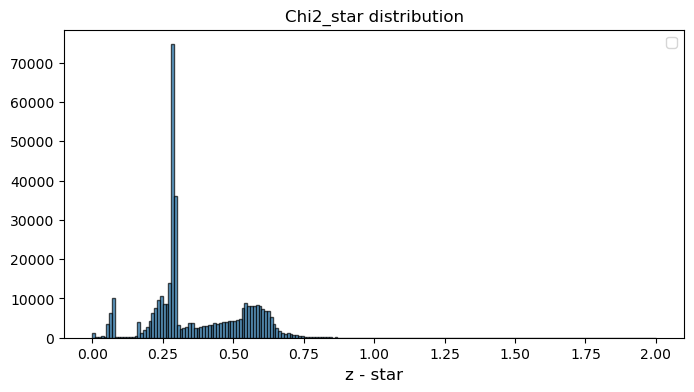

In [3]:
#Plot z hist
plt.figure(figsize=(8, 4))
hist_values = plt.hist(photoz_des['Z_BEST'], bins=200, alpha=0.7, edgecolor='black', log=False, range=(0,2))#, density=True)#, log=True)
plt.title("Chi2_star distribution")

plt.xlabel('z - star', fontsize=12)
# plt.ylim(0,0.010)
plt.legend()
plt.show()

Chi2 distribution, pit and qq-plot

[ 717.247 1043.92   475.276 ...  248.006  215.133 8710.18 ]


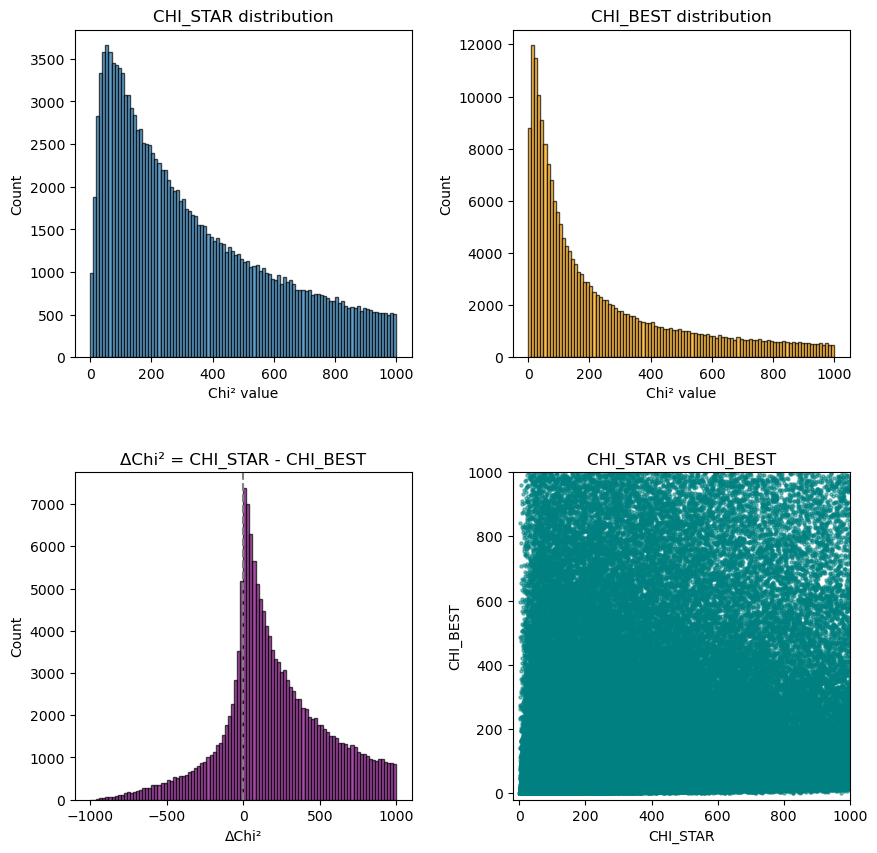

In [6]:
lsp.chi_stats(data = photoz_des, mask_min=-1000, mask_max=1000, bins=100)

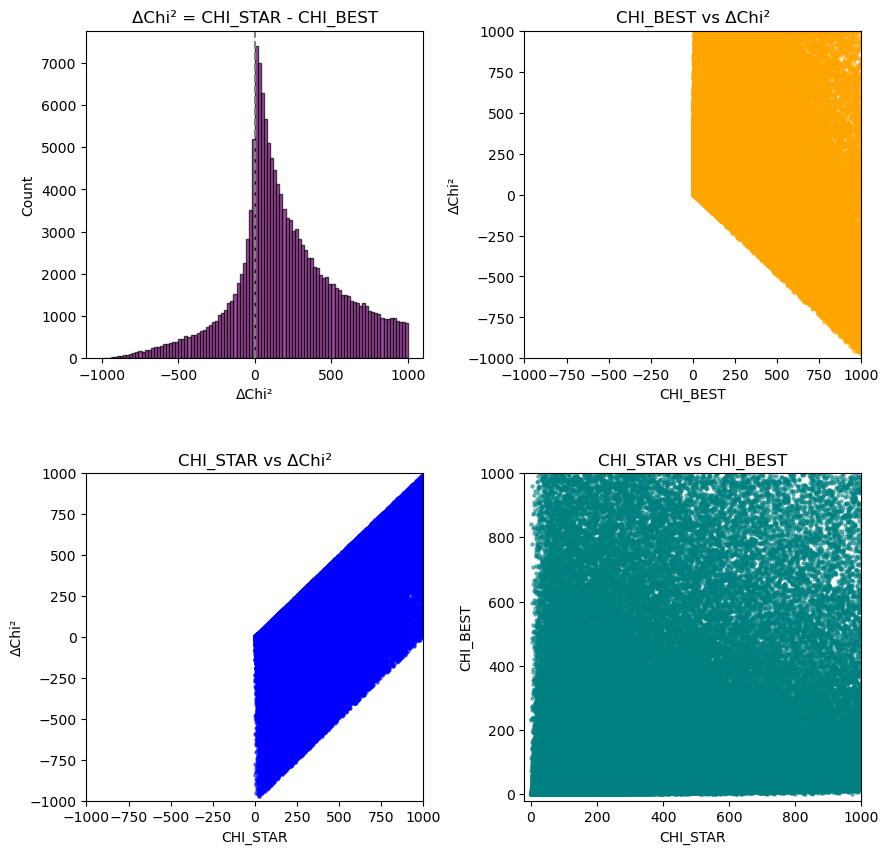

In [7]:
lsp.more_chi_stats(data = photoz_des, mask_min=-1000, mask_max=1000, bins=100)

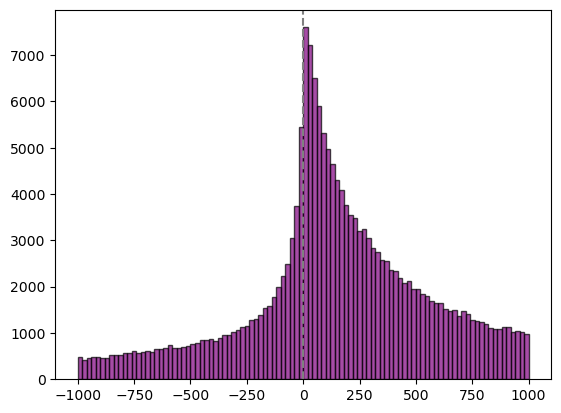

In [6]:
plt.figure()
delta_chi=photoz_des['CHI_STAR'] - photoz_des['CHI_BEST']
hist_range = (-1000,1000)
plt.hist(delta_chi, bins=100, alpha=0.7, edgecolor='black', color='purple', range=hist_range)
plt.axvline(0, color='gray', linestyle='--')
plt.show()

flag VS stype

NameError: name 'zphota' is not defined

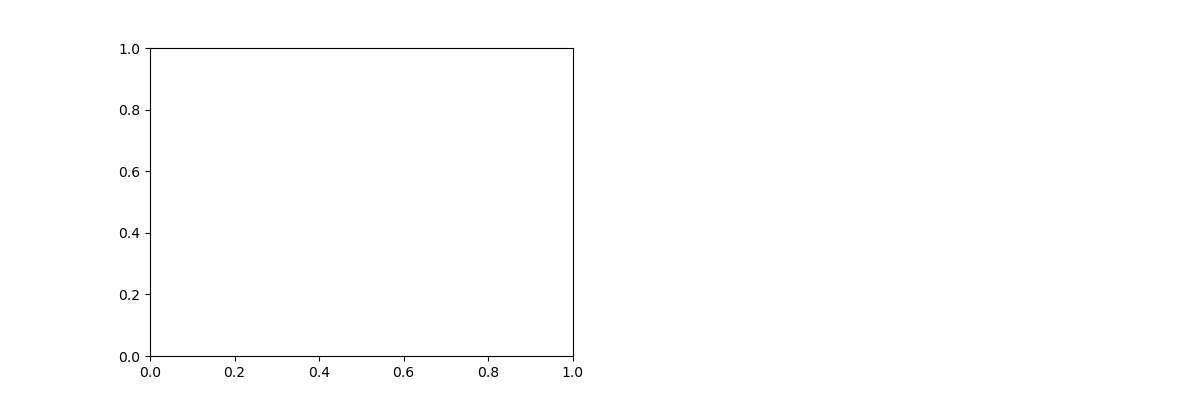

In [43]:
###Flag and type distribution

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(zphota["PDZ_FLAG"][zphota["PDZ_FLAG"]>=0], bins=100, alpha=0.7, edgecolor='black')#, density=True)#, log=True)
plt.title("PDZ flag distribution")
plt.subplot(122)
plt.title("S-type distribution")
plt.hist(zphota["S_TYPE"], bins=100, alpha=0.7, edgecolor='black', color='orange')#, density=True)#, log=True)

# plt.ylim(0,0.010)
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
plt.rcParams.update({'font.size': 6})
contingency = pd.crosstab(zphota["S_TYPE"], zphota["PDZ_FLAG"])

# Plot avec seaborn
plt.figure(figsize=(18,16))
sns.heatmap(contingency, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 6.5})
plt.title("Distribution des flags par type d'étoile")
plt.ylabel("Type d'étoile")
plt.xlabel("Flag")
plt.show()


In [ ]:
plt.figure(figsize=(15,13))

sns.stripplot(x=zphota["CHI_STAR"]-zphota["CHI_BEST"], y=zphota["S_TYPE"], jitter=True, size=6)
plt.title("DeltaChi distribution as a function of source-type")
plt.ylabel("Type d'étoile")
plt.xlabel("Delta Chi =  Chi_star - Chi_best")
plt.xlim(-1e4,1e4)
plt.show()

In [ ]:
###Flag and type distribution

plt.figure(figsize=(4, 4))
mask=(zphota["CHI_STAR"]<1e4) & (zphota["CHI_BEST"]<1e4)
plt.hist(zphota["CHI_STAR"] - zphota["CHI_BEST"], bins=1000000, alpha=0.7, edgecolor='black')#, density=True)#, log=True)
plt.title("Delta Chi dist")


# plt.ylim(0,0.010)
plt.legend()
plt.show()